<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification and Logistic Regression

**Classification Problems and common use cases**

- What is Classification?

- Types of Classification

  - Binary Classification

  - Multi-Class Classification

  - Multi-Label Classification

- Common Use cases

  - Healthcare|Finance|Retail|Natural Language Processing|Autonomous Systems

**Logistic Regression for Binary Classification**

- What is Logistic Regression?

- The Logistic Regression Model

  - Equation

    - Logistic Regression applies the sigmoid function to a linear equation

$$p(y = 1 | x) = σ(β0 + β1x1 + β2x2 + ... + βnxn)$$

- where:

  - $p(y = 1 | x)$: Probability of the Positive class

  - $σ(z)$: Sigmoid function

Where the sigmoid function is:

$$σ(z) = 1 / (1 + e^{-z})$$




**Logistic Regression for Binary Classification**

- The Logistic Regression model

- Sigmoid Function

    - Maps the Output to a range between 0 and 1

    - If p(y = 1|x) >= 0.5, the Prediction is class 1; otherwise, it is class 0

$$σ(z) = 1 / (1 + e^{-z})$$

- Decision Boundary

  - The threshold(default is 0.5) used to classify instances

  - Decision Boundaries can be adjusted to optimize for precision or recall

- Interpretation of Coefficients:

  - $\beta0$: Interpret, the baseline probability

  - $\beta i$: Effect of feature xi, on the log-odds of the positive class






**Sigmoid Function, Decision Boundary, and Interpretation**

  - Sigmoid Function in Action

    - The Sigmoid Function ensures outputs are interpretable as probabilites

    - Visualization of the Sigmoid function can illustrate how probabilites are mapped from raw model predictions

- Decision Boundary

  - Default Threshold is 0.5

  - Adjusting the threshold can balance precision and recall depending on the use case

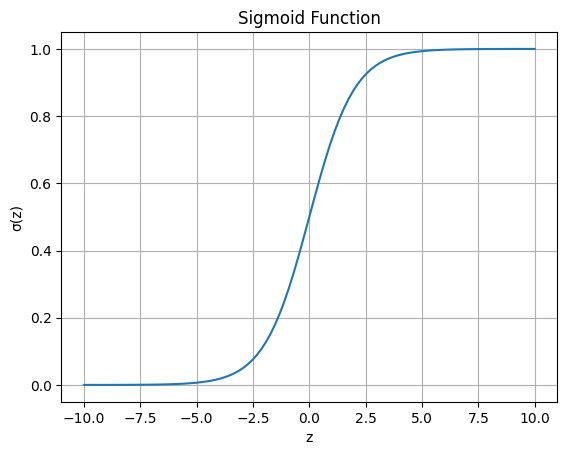

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid Function
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Generate Values
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot
plt.plot(z, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()

**Implement a Logistic Regression model to classify a dataset(Ex: Predicting if a Customer will make a purchase) and Analyze model perfomance**



Accuracy: 
 1.0
Precision: 
 1.0
Recall: 
 1.0
F1-Score: 
 1.0
Confusion Matrix: 
 [[17  0]
 [ 0 23]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


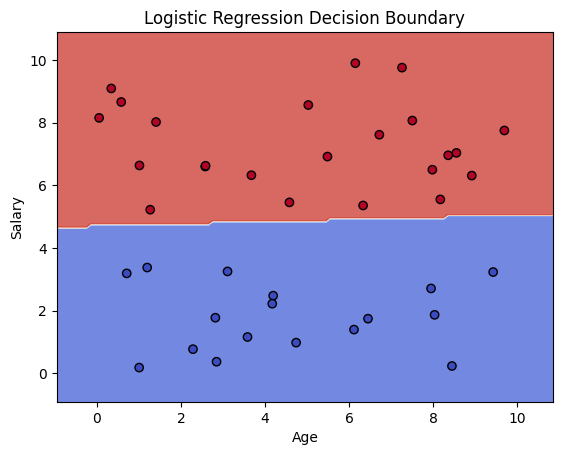

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate Synthetic dataset
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 2) * 10
y = (5 + X[:, 1] > 10).astype(int) # Changed condition to generate both 0s and 1s

# Create a DataFrame
df = pd.DataFrame(X, columns=['Age', 'Salary'])
df['Purchase'] = y

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[["Age","Salary"]], df["Purchase"], test_size = 0.2)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate perfomance
print("Accuracy: \n", accuracy_score(y_test, y_pred))
print("Precision: \n", precision_score(y_test, y_pred))
print("Recall: \n", recall_score(y_test, y_pred))
print("F1-Score: \n", f1_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

import matplotlib.pyplot as plt

# Plot decision Boundary
x_min, x_max = df["Age"].min() - 1, df["Age"].max() + 1
y_min, y_max = df["Salary"].min() - 1, df["Salary"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# predict probabilities for grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test["Age"], X_test["Salary"], c=y_test, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()